<a href="https://colab.research.google.com/github/MianUsmanAhmed12/Lab4/blob/main/my_recomender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [2]:
# reading csv and giving the columns names
data  = pd.read_excel('jester-data-1.xlsx',names=(x for x in range(0,101)))
data.rename(columns={0:'num of ratings'},inplace=True)
data

FileNotFoundError: ignored

In [ ]:
#deleting column which does not have rating
del data['num of ratings']
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
#preparing for test set
test_df=data


In [ ]:
#preparing for validation test

arr = data.values

In [ ]:
#using helper function to replace 10% non null values with 99
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, validation_indices = replace(arr, 0.1)

In [ ]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_item_features

array([[0.538, 0.838],
       [0.132, 0.427],
       [0.043, 0.198],
       [0.586, 0.654],
       [0.724, 0.725],
       [0.327, 0.554],
       [0.318, 0.879],
       [0.035, 0.326],
       [0.285, 0.631],
       [0.945, 0.242],
       [0.544, 0.142],
       [0.442, 0.397],
       [0.914, 0.844],
       [0.69 , 0.568],
       [0.598, 0.962],
       [0.219, 0.062],
       [0.137, 0.976],
       [0.267, 0.741],
       [0.934, 0.357],
       [0.175, 0.084],
       [0.604, 0.9  ],
       [0.047, 0.461],
       [0.943, 0.834],
       [0.089, 0.355],
       [0.244, 0.169],
       [0.708, 0.575],
       [0.727, 0.538],
       [0.268, 0.825],
       [0.033, 0.739],
       [0.847, 0.483],
       [0.604, 0.708],
       [0.342, 0.75 ],
       [0.261, 0.91 ],
       [0.744, 0.621],
       [0.526, 0.502],
       [0.937, 0.28 ],
       [0.113, 0.52 ],
       [0.822, 0.348],
       [0.157, 0.591],
       [0.781, 0.561],
       [0.733, 0.301],
       [0.679, 0.144],
       [0.737, 0.813],
       [0.3

In [ ]:
latent_user_preferences

array([[0.496, 0.755],
       [0.495, 0.855],
       [0.752, 0.429],
       ...,
       [0.069, 0.341],
       [0.56 , 0.762],
       [0.787, 0.462]])

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                #if rating is not equal to 99 changed this line
                if(rating != 99):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/30:	MSE=26.280498
Iteration 10/30:	MSE=23.296776
Iteration 20/30:	MSE=21.273162


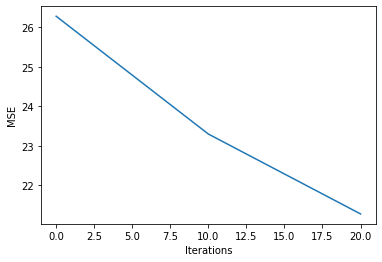

In [ ]:
num_iter = 30
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[2.606, 2.756, 2.801, ..., 2.437, 2.486, 2.71 ],
       [5.14 , 5.114, 4.979, ..., 5.633, 4.38 , 6.434],
       [1.297, 1.052, 0.853, ..., 2.033, 0.717, 2.429],
       ...,
       [0.464, 0.528, 0.562, ..., 0.336, 0.504, 0.354],
       [0.973, 0.879, 0.792, ..., 1.294, 0.684, 1.517],
       [2.606, 2.376, 2.159, ..., 3.409, 1.869, 3.991]])

In [ ]:
#comparing the predicted rating with that of original ones
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(4.08, 1.6466887862054105)","(-0.29, 1.6614184771022535)","(6.36, 1.6941613269685027)","(4.37, 1.1852659050165266)","(-2.38, 1.3340350255806208)","(-9.66, 2.2707208888145107)","(-0.73, 0.9360088138754977)","(-5.34, 0.5313276214801169)","(8.88, 1.4718019602484733)","(9.22, 1.8074945569869216)",...,"(2.82, 1.8859945888434204)","(-4.95, 1.757304356761638)","(-0.29, 2.044955041227197)","(7.86, 1.6491913104572298)","(99.0, 1.5777256879579946)","(-2.14, 1.754374783351094)","(3.06, 1.7383950465951057)","(0.34, 1.6525734272692056)","(-4.32, 1.3634300033078497)","(99.0, 1.8901217199797036)"
1,"(99.0, 4.323605157486055)","(99.0, 4.1750636329540205)","(99.0, 3.989967740324988)","(99.0, 1.6854321297925998)","(9.03, 3.424745998420738)","(9.27, 6.688963917502012)","(99.0, 1.8327191638079103)","(9.27, 0.5260376452448248)","(99.0, 2.6003630587179756)","(99.0, 4.811708270559852)",...,"(99.0, 5.993980934991792)","(99.0, 5.351394390143338)","(99.0, 6.998132604471611)","(9.08, 4.685371110232641)","(99.0, 4.570931549277786)","(99.0, 5.500954340172369)","(99.0, 5.5092545415621395)","(99.0, 5.143953467235778)","(99.0, 3.4800017597427058)","(99.0, 5.933369432503373)"
2,"(99.0, 2.680300943639094)","(8.35, 2.578404762499376)","(99.0, 2.4494531410584397)","(99.0, 0.9700678528258853)","(1.8, 2.1189927347899515)","(8.16, 4.1847358276571365)","(-2.82, 1.103393525388391)","(6.21, 0.28055694643864026)","(99.0, 1.54577564441115)","(1.84, 2.986340178024561)",...,"(99.0, 3.770417923433073)","(99.0, 3.3560951345995367)","(99.0, 4.423667160232597)","(0.53, 2.9231834813273214)","(99.0, 2.8560763428826057)","(99.0, 3.457052241455723)","(99.0, 3.464831679297358)","(99.0, 3.2310377676873907)","(99.0, 2.152097969393661)","(99.0, 3.729098929790175)"
3,"(8.5, 3.0417170433367025)","(4.61, 2.959962934381394)","(99.0, 2.8626802037595094)","(-5.39, 1.3590637345736014)","(1.36, 2.4188272715565793)","(99.0, 4.6174639464472795)","(7.04, 1.3652694887493673)","(4.61, 0.4756633994414575)","(99.0, 1.9829754971396822)","(5.73, 3.3770992790462904)",...,"(5.19, 4.090240439697501)","(5.58, 3.6751922072740024)","(4.27, 4.725381068007324)","(99.0, 3.253067957096015)","(5.73, 3.163663872454784)","(1.55, 3.761303491262163)","(99.0, 3.7610365106946264)","(6.55, 3.52104790273781)","(1.8, 2.460364352212244)","(1.6, 4.056280369080489)"
4,"(-6.17, -3.717346217777866)","(-3.54, -3.898948363707425)","(0.44, -4.187657715414312)","(-8.5, -3.8061732507455086)","(-7.09, -3.0733036123791404)","(-4.32, -4.550099953407742)","(-8.69, -2.608179891398196)","(-0.87, -1.8880788843976999)","(-6.65, -4.324181366061306)","(-1.8, -4.028152115866293)",...,"(-3.54, -3.431853386037915)","(-6.89, -3.3827782141406124)","(-0.68, -3.3257370164860878)","(99.0, -3.4415386339522436)","(-2.18, -3.222201102348852)","(-3.35, -3.2515582490137103)","(0.05, -3.1756606969940138)","(99.0, -3.092829357090335)","(-5.05, -3.1570350002936016)","(-3.45, -3.49778557270836)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,"(99.0, 2.2167255165250395)","(99.0, 1.9643464295133493)","(9.08, 1.6142998482130473)","(2.33, -0.4787336832830442)","(3.2, 1.6825110111411155)","(6.75, 4.1136413955298075)","(-8.79, 0.3514409193709632)","(-0.53, -0.5482969863738473)","(-8.74, 0.14339700959167212)","(7.23, 2.5289938103389593)",...,"(8.83, 4.053980345528397)","(-1.21, 3.437725568754489)","(9.22, 5.121130690342409)","(-6.7, 2.7365391734592084)","(99.0, 2.7467696934005916)","(9.03, 3.6624221826883705)","(6.55, 3.7139833645140117)","(8.69, 3.39494756066584)","(8.79, 1.6902036686759512)","(7.43, 3.955652822463258)"
24978,"(9.13, 1.2510287863289538)","(-8.16, 1.4020955760666796)","(8.59, 1.629495122807716)","(9.08, 1.9663740844470392)","(0.87, 1.0717332948690135)","(-8.93, 1.1820434875410026)","(-3.5, 1.1779936782457034)","(5.78, 1.0529508571874295)","(-8.11, 2.0625841408526133)","(4.9, 1.323971100699353)",...,"(-1.17, 0.6542838369215715)","(-5.73, 0.78

In [ ]:
#Calculating the performance (e.g., MSE) of the algorithm on the **validation dataset
orig_data = arr
assert len(validation_indices[0]) == len(validation_indices[1])
validation_size = len(validation_indices[0])
errors = []
for iterations in range(validation_size):
  users_id = validation_indices[0][iterations]
  jokes_id = validation_indices[1][iterations]
  prediction_rating = predict_rating(users_id, jokes_id)
  real_rating = orig_data[users_id][jokes_id]
  error = prediction_rating - real_rating
  errors.append(error)
mse = (np.array(errors) ** 2).mean()
print('Validation MSE:', mse)

Validation MSE: 27.66194814599751


In [ ]:
#test set 
test_data = np.zeros(orig_data.shape)
rows, cols = orig_data.shape

for users_id in range(rows):
  for jokes_id in range(cols):
    if orig_data[users_id][jokes_id] == 99:
      test_data[users_id][jokes_id] = predict_rating(users_id, jokes_id)
    else:
      test_data[users_id][jokes_id] = orig_data[users_id][jokes_id]

In [ ]:
test_data

array([[ 4.080e+00, -2.900e-01,  6.360e+00, ...,  3.400e-01, -4.320e+00,
         1.070e+00],
       [ 6.092e-01,  6.861e-01,  1.928e-01, ...,  2.737e-01,  2.217e-01,
         3.495e-01],
       [ 4.318e-01,  8.350e+00,  1.159e-01, ...,  1.056e-01,  5.120e-01,
         3.816e-01],
       ...,
       [ 3.908e-01,  4.399e-01,  1.263e-01, ...,  1.869e-01,  9.658e-02,
         2.069e-01],
       [ 1.583e-02,  1.789e-02,  3.606e-03, ...,  1.139e-03,  2.973e-02,
         1.813e-02],
       [ 2.430e+00,  2.670e+00, -3.980e+00, ...,  3.508e-01,  7.962e-01,
         7.442e-01]])

In [ ]:
#replace the 99 with nan values
test_df.replace(to_replace=99,value=np.nan,inplace=True)


In [ ]:
test_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24980,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Means of best rated joke
test_df.mean().sort_values(ascending=False).head(1)

50    3.665066
dtype: float64

In [ ]:
#means of worst rated jokes
test_df.mean().sort_values(ascending=False).tail(1)

58   -3.83352
dtype: float64